# COVID-19 DATA ANALYSIS

### Dataset Description

ClinicalTrials.gov is a database of privately and publicly funded clinical studies conducted around the world. It is maintained by the National Institute of Health. All data is publicly available and the site provides a direct download feature which makes it super easy to use relevant data for analysis. This dataset consists of clinical trials related to COVID 19 studies presented on the site. The dataset consists of XML files where each XML file corresponds to one study. The filename is the NCT number which is a unique identifier of a study in the ClinicalTrials repository. Additionally, a CSV file has also been provided, which might not have as much information as contained in the XML file, but does give sufficient information.


### Objective
The objective is to explore the dataset to gain insights into the characteristics of COVID-19 clinical trials, such as their status, phases, study designs, and demographics.

In [1]:
# Importing important libraries
import numpy as np, pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('covid_19.csv')
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Unnamed: 1287,Unnamed: 1288,Unnamed: 1289,Unnamed: 1290,Unnamed: 1291,Unnamed: 1292,Unnamed: 1293,Unnamed: 1294,Unnamed: 1295,Unnamed: 1296
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(5786, 1297)

In [4]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators',
       ...
       'Unnamed: 1287', 'Unnamed: 1288', 'Unnamed: 1289', 'Unnamed: 1290',
       'Unnamed: 1291', 'Unnamed: 1292', 'Unnamed: 1293', 'Unnamed: 1294',
       'Unnamed: 1295', 'Unnamed: 1296'],
      dtype='object', length=1297)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Columns: 1297 entries, Rank to Unnamed: 1296
dtypes: float64(1), object(1296)
memory usage: 57.3+ MB


In [6]:
df.describe()

,Unnamed: 1295
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [7]:
# Printing all the columns
for i in df.columns:
    print(i)

Rank
NCT Number
Title
Acronym
Status
Study Results
Conditions
Interventions
Outcome Measures
Sponsor/Collaborators
Gender
Age
Phases
Enrollment
Funded Bys
Study Type
Study Designs
Other IDs
Start Date
Primary Completion Date
Completion Date
First Posted
Results First Posted
Last Update Posted
Locations
Study Documents
URL
Unnamed: 27
Unnamed: 28
Unnamed: 29
Unnamed: 30
Unnamed: 31
Unnamed: 32
Unnamed: 33
Unnamed: 34
Unnamed: 35
Unnamed: 36
Unnamed: 37
Unnamed: 38
Unnamed: 39
Unnamed: 40
Unnamed: 41
Unnamed: 42
Unnamed: 43
Unnamed: 44
Unnamed: 45
Unnamed: 46
Unnamed: 47
Unnamed: 48
Unnamed: 49
Unnamed: 50
Unnamed: 51
Unnamed: 52
Unnamed: 53
Unnamed: 54
Unnamed: 55
Unnamed: 56
Unnamed: 57
Unnamed: 58
Unnamed: 59
Unnamed: 60
Unnamed: 61
Unnamed: 62
Unnamed: 63
Unnamed: 64
Unnamed: 65
Unnamed: 66
Unnamed: 67
Unnamed: 68
Unnamed: 69
Unnamed: 70
Unnamed: 71
Unnamed: 72
Unnamed: 73
Unnamed: 74
Unnamed: 75
Unnamed: 76
Unnamed: 77
Unnamed: 78
Unnamed: 79
Unnamed: 80
Unnamed: 81
Unnamed: 82
Unna

## DATA CLEANING

In [8]:
df.columns.get_loc('URL')

26

In [9]:
# Let's drop the columns with prefix 'Unnamed'
df = df.drop((df.iloc[:, 27:]),axis=1)

In [10]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5786 entries, 0 to 5785
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     5786 non-null   object
 1   NCT Number               5786 non-null   object
 2   Title                    5786 non-null   object
 3   Acronym                  2483 non-null   object
 4   Status                   5786 non-null   object
 5   Study Results            5786 non-null   object
 6   Conditions               5786 non-null   object
 7   Interventions            4900 non-null   object
 8   Outcome Measures         5751 non-null   object
 9   Sponsor/Collaborators    5786 non-null   object
 10  Gender                   5776 non-null   object
 11  Age                      5786 non-null   object
 12  Phases                   3325 non-null   object
 13  Enrollment               5752 non-null   object
 14  Funded Bys               5786 non-null  

In [12]:
df.describe()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
count,5786,5786,5786,2483,5786,5786,5786,4900,5751,5786,...,5785,5752,5750,5750,5786,39,5786,5201,185,5783
unique,5786,5786,5778,2341,15,5,3070,4340,5690,3634,...,5721,657,880,981,441,36,272,4258,185,5783
top,1,NCT04785898,Study to Evaluate the Safety and Efficacy of V...,COVID-19,Recruiting,No Results Available,COVID-19,Other: No intervention,Mortality,Assistance Publique - Hôpitaux de Paris,...,1,"May 1, 2020","December 31, 2021","December 31, 2021","April 24, 2020","November 4, 2020","April 8, 2021","Uhmontpellier, Montpellier, France","""Statistical Analysis Plan"", https://ClinicalT...",https://ClinicalTrials.gov/show/NCT04785898
freq,1,1,2,47,2805,5747,720,32,5,78,...,17,113,122,179,108,2,109,19,1,1


In [13]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

## MISSING VALUES

In [14]:
total_missing = (df.isna().sum()/len(df))*100
total_missing

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.086070
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.312824
Outcome Measures            0.604908
Sponsor/Collaborators       0.000000
Gender                      0.172831
Age                         0.000000
Phases                     42.533702
Enrollment                  0.587625
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.604908
Other IDs                   0.017283
Start Date                  0.587625
Primary Completion Date     0.622191
Completion Date             0.622191
First Posted                0.000000
Results First Posted       99.325959
Last Update Posted          0.000000
Locations                  10.110612
Study Documents            96.802627
URL                         0.051849
d

In [15]:
# Dropping columns with >50% of missing values
df = df.drop(['Results First Posted','Study Documents','Acronym'], axis=1)

df.shape

(5786, 24)

In [16]:
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Status', 'Study Results', 'Conditions',
       'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender',
       'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type',
       'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date',
       'Completion Date', 'First Posted', 'Last Update Posted', 'Locations',
       'URL'],
      dtype='object')

In [17]:
# since we don't know how many subjects were enrolled for the study let's impute the missing values with 0
df['Enrollment'] = df['Enrollment'].fillna(0)

# checking the null values again
df['Enrollment'].isna().sum()

0

In [18]:
# Let's fill the NaN values in columns with >10% with 'unknown' since we don't know the reason
df[['Phases', 'Interventions', 'Locations']]=df[['Phases', 'Interventions', 'Locations']].fillna('Unknown')

# Checking the null values in these columns
df[['Phases', 'Interventions', 'Locations']].isna().sum()

Phases           0
Interventions    0
Locations        0
dtype: int64

In [19]:
# The remaining entries with NaN values will be dropped 
df.dropna(inplace=True)

In [20]:
df.isna().sum()

Rank                       0
NCT Number                 0
Title                      0
Status                     0
Study Results              0
Conditions                 0
Interventions              0
Outcome Measures           0
Sponsor/Collaborators      0
Gender                     0
Age                        0
Phases                     0
Enrollment                 0
Funded Bys                 0
Study Type                 0
Study Designs              0
Other IDs                  0
Start Date                 0
Primary Completion Date    0
Completion Date            0
First Posted               0
Last Update Posted         0
Locations                  0
URL                        0
dtype: int64

In [21]:
# Listing the categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Rank', 'NCT Number', 'Title', 'Status', 'Study Results', 'Conditions',
       'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender',
       'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type',
       'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date',
       'Completion Date', 'First Posted', 'Last Update Posted', 'Locations',
       'URL'],
      dtype='object')

In [22]:
# Listing the numerical columns
numerical = df.select_dtypes(exclude='object').columns
numerical

Index([], dtype='object')

In [23]:
df.head(5)

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,Interventional,Allocation: N/A|Intervention Model: Single Gro...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,Interventional,Allocation: Randomized|Intervention Model: Par...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,Observational,Observational Model: Cohort|Time Perspective: ...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,Observational,Observational Model: Cohort|Time Perspective: ...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,Observational,Observational Model: Cohort|Time Perspective: ...,CHRO-2020-10,"May 5, 2020",May-21,May-21,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924


* The ranks of the studies are same as the serial numbers therefore we will drop the rank 
* NCT number & URL also are not useful for our analysis therefore we are dropping them  

### Dropping unwanted columns

In [24]:
df = df.drop(['Rank','NCT Number','URL', 'Title', 'Other IDs'], axis=1)

In [25]:
df.columns

Index(['Status', 'Study Results', 'Conditions', 'Interventions',
       'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases',
       'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations'],
      dtype='object')

In [26]:
df.Phases.value_counts()

Phases
Unknown                                                                            2414
Not Applicable                                                                     1353
Phase 2                                                                             685
Phase 3                                                                             448
Phase 1                                                                             234
Phase 2|Phase 3                                                                     200
Phase 1|Phase 2                                                                     192
Phase 4                                                                             161
Early Phase 1                                                                        46
 United States|University of Kansas Cancer Center at North Kansas City Hospital       1
 Spain|Hospital Clinic de Barcelona /ID# 157552                                       1
 Sochi                   

In [27]:
# checking the index of these 
df.loc[df['Phases'] ==' United States|University of Kansas Cancer Center at North Kansas City Hospital'].index

df.loc[df['Phases'] ==' Spain|Hospital Clinic de Barcelona /ID# 157552'].index

df.loc[df['Phases']==' Sochi'].index

Index([5731], dtype='int64')

In [28]:
# Dropping the values at these indices
df.drop(892, inplace=True)
df.drop(5731, inplace=True)
df.drop(5544, inplace=True)

In [29]:
# Enrollment is object type therefore converting it into numeric type
df['Enrollment'] = pd.to_numeric(df['Enrollment'], errors='coerce')
df['Enrollment']

0       1000.0
1         60.0
2        500.0
3       2500.0
4         50.0
         ...  
5781     566.0
5782     200.0
5783      88.0
5784     396.0
5785     716.0
Name: Enrollment, Length: 5733, dtype: float64

In [30]:
# Let's extract the country names from the Locations
df['country'] = df['Locations'].str.split().str[-1]
df['country']

0         France
1       Colombia
2         Marino
3           Kong
4         France
          ...   
5781      States
5782     Germany
5783      States
5784     Denmark
5785      States
Name: country, Length: 5733, dtype: object

In [31]:
# Dropping the Locations from the dataset 
df = df.drop('Locations', axis=1)

In [32]:
df['Study Designs'].value_counts()

Study Designs
Observational Model: Cohort|Time Perspective: Prospective                                                                                                                     1007
Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: None (Open Label)|Primary Purpose: Treatment                                                           572
Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: Quadruple (Participant, Care Provider, Investigator, Outcomes Assessor)|Primary Purpose: Treatment     310
Observational Model: Cohort|Time Perspective: Retrospective                                                                                                                    281
Allocation: N/A|Intervention Model: Single Group Assignment|Masking: None (Open Label)|Primary Purpose: Treatment                                                              241
                                                                                           

In [33]:
df['Study Type'].value_counts()

Study Type
Interventional    3319
Observational     2414
Name: count, dtype: int64

In [34]:
df['Study Designs'].value_counts()

Study Designs
Observational Model: Cohort|Time Perspective: Prospective                                                                                                                     1007
Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: None (Open Label)|Primary Purpose: Treatment                                                           572
Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: Quadruple (Participant, Care Provider, Investigator, Outcomes Assessor)|Primary Purpose: Treatment     310
Observational Model: Cohort|Time Perspective: Retrospective                                                                                                                    281
Allocation: N/A|Intervention Model: Single Group Assignment|Masking: None (Open Label)|Primary Purpose: Treatment                                                              241
                                                                                           

In [35]:
# Extracting the study purpose from the study design
df['study_purpose'] = df['Study Designs'].str.split().str[-1]

In [36]:
df['study_purpose'].value_counts()

study_purpose
Treatment          2042
Prospective        1457
Prevention          562
Retrospective       466
Other               357
Cross-Sectional     323
Care                180
Diagnostic          149
Research            102
Science              48
Screening            38
Feasibility           9
Name: count, dtype: int64

In [37]:
df.columns

Index(['Status', 'Study Results', 'Conditions', 'Interventions',
       'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases',
       'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'country', 'study_purpose'],
      dtype='object')

* For almost all the studies results are unavailable
* Outcome measures of trials are unique to each study


### Converting the date columns to datetime type and extracting the year columns

In [38]:
import datetime as dt

In [39]:
# Extracting the 'year' from the 'start date' column
df['start_year'] = df['Start Date'].str.split(',').str[-1]
df['start_year'] = df['start_year'].str.split('-').str[-1]
df['start_year'].value_counts()

start_year
 2020    4234
 2021     843
21        253
20        220
 2019      93
 2018      37
 2017      24
16          6
 2016       6
 2013       3
 2012       3
 2015       2
15          2
22          1
 2014       1
 1998       1
14          1
17          1
10          1
 2011       1
Name: count, dtype: int64

In [40]:
# converting the years in double digits to four digits 
df['start_year'] = df['start_year'].astype(object).apply(lambda x: '20'+ x if len(x)<3 else x)
df['start_year'].value_counts()

# removing extra spaces
df['start_year'] = df['start_year'].str.strip()
df['start_year'].value_counts()

# converting to date type
df['start_year'] = pd.to_datetime(df['start_year'], errors='coerce').dt.year
df['start_year']

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
5781    2020
5782    2021
5783    2021
5784    2021
5785    2021
Name: start_year, Length: 5733, dtype: int32

In [41]:
df['Completion Date']

0          April 30, 2021
1        January 29, 2021
2           June 15, 2021
3         August 31, 2020
4                  May-21
              ...        
5781               Apr-23
5782               Dec-24
5783               Jul-21
5784    December 31, 2022
5785               Feb-25
Name: Completion Date, Length: 5733, dtype: object

In [71]:
# Extracting the year from the completion date 
df['completion_year'] = df['Completion Date'].str.split(' ').str[-1]
df['completion_year'] = df['completion_year'].str.split('-').str[-1]
df['completion_year']

0       2021
1       2021
2       2021
3       2020
4         21
        ... 
5781      23
5782      24
5783      21
5784    2022
5785      25
Name: completion_year, Length: 5733, dtype: object

In [73]:
# converting the year in double digits to four digits
df['completion_year'] = df['completion_year'].apply(lambda x: '20'+ x if len(x)<3 else x)
# removing the extra spaces
df['completion_year'] = df['completion_year'].str.strip()
# converting into date type
df['completion_year']  = pd.to_datetime(df['completion_year'], errors='coerce').dt.year
df['completion_year']

0       2021
1       2021
2       2021
3       2020
4       2021
        ... 
5781    2023
5782    2024
5783    2021
5784    2022
5785    2025
Name: completion_year, Length: 5733, dtype: int32

In [82]:
# Converting the rows into lower type
df['Conditions'] = df['Conditions'].apply(lambda x: x.lower())
df['Conditions'].value_counts(ascending=False)[:40]

Conditions
covid-19                                           802
covid19                                            704
covid                                               95
covid 19                                            55
sars-cov-2                                          53
coronavirus infection                               51
coronavirus                                         46
sars-cov2                                           41
corona virus infection                              38
covid-19 pneumonia                                  32
sars-cov-2 infection                                31
covid-19 infection                                  29
sars-cov infection                                  25
covid19|sars-cov infection                          23
covid-19|sars-cov-2                                 21
sars-cov 2                                          21
coronavirus infections                              19
healthy                                             17

In [104]:
df['conditions'] = df['Conditions'].apply(lambda x: 'covid_19' if x.startswith('co') else 'sars' if x.startswith('sa') else 'ards' if x.startswith('a') else x)
df['conditions'].value_counts(ascending=False)[:10]

conditions
covid_19                                           3382
sars                                                418
ards                                                253
healthy                                              17
cancer                                               13
severe acute respiratory syndrome coronavirus 2      11
chronic pain                                          8
pneumonia, viral                                      7
infection viral                                       7
stress                                                7
Name: count, dtype: int64

In [106]:
df['conditions'] = df['conditions'].apply(lambda x: 'sars' if x.startswith('severe acute') else 'cancer' if x.startswith('cancer') or x.endswith('cancer') else 'viral infections' if x.startswith('viral') or x.endswith('viral') else x)
df['conditions'].value_counts(ascending=False)[:50]

conditions
covid_19                                         3382
sars                                              459
ards                                              253
cancer                                             49
viral infections                                   27
healthy                                            17
chronic pain                                        8
stress                                              7
multiple sclerosis                                  7
bioequivalence                                      7
2019-ncov                                           7
respiratory distress syndrome, adult                6
depression                                          6
heart failure                                       6
emergencies                                         5
respiratory failure                                 5
severe covid-19                                     5
blood donation                                      4
rheumatoid arthri

In [154]:
df.columns

Index(['Status', 'Study Results', 'Conditions', 'Interventions',
       'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases',
       'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'country', 'study_purpose', 'start_year',
       'completion_year', 'conditions'],
      dtype='object')

In [167]:
# creating a new column named 'duration' that denotes the duration of the trial
df['study_duration'] = df['completion_year'] - df['start_year']
df['study_duration'].value_counts(ascending=False)

study_duration
1     2454
0     2199
2      663
3      188
4       78
5       65
6       39
10      15
11       6
7        5
8        5
12       4
9        3
13       2
79       1
23       1
21       1
20       1
22       1
15       1
16       1
Name: count, dtype: int64

In [186]:
# Checking the details of study that will be completing in 2099 with a duration of 79 years
df[df['completion_year']==2099]

,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,...,Primary Completion Date,Completion Date,First Posted,Last Update Posted,country,study_purpose,start_year,completion_year,conditions,study_duration
4613,Recruiting,No Results Available,health care worker (hcw)|covid-19,others,Number and percent of participants who enroll ...,Duke University|Patient-Centered Outcomes Rese...,All,"18 Years to 89 Years (Adult, Older Adult)",Unknown,100000.0,...,"December 31, 2099","December 31, 2099","April 13, 2020","March 30, 2021",States,Prospective,2020,2099,health care worker (hcw)|covid-19,79


In [187]:
# A study with duration of 79 is deleted from the dataframe since it is an outlier that hinders the analysis
df.drop(4613, inplace=True)

In [193]:
df['Interventions'].value_counts()

Interventions
others        3305
Drug          1511
Diagnostic     603
Device         313
Name: count, dtype: int64

In [59]:
# changing the interventions which don't belong to drug, diagnostic or device as other.
df['Interventions'] = df['Interventions'].apply(
    lambda x: 'Diagnostic' if isinstance(x, str) and x.startswith('Di') else
              ('Drug' if isinstance(x, str) and x.startswith('Dr') else
               ('Device' if isinstance(x, str) and x.startswith('De') else 'others'))
)

In [194]:
df['Interventions'].value_counts()

Interventions
others        3305
Drug          1511
Diagnostic     603
Device         313
Name: count, dtype: int64

In [170]:
df.shape

(5733, 24)

In [218]:
df.describe()

,Enrollment,start_year,completion_year,study_duration
count,5.732000e+03,5732.000000,5732.000000,5732.000000
mean,1.835415e+04,2020.120377,2021.118981,0.998604
std,4.051408e+05,0.705308,1.297411,1.425274
min,0.000000e+00,1998.000000,2018.000000,0.000000
25%,6.000000e+01,2020.000000,2020.000000,0.000000
50%,1.700000e+02,2020.000000,2021.000000,1.000000
75%,5.527500e+02,2020.000000,2021.000000,1.000000
max,2.000000e+07,2022.000000,2042.000000,23.000000


* As we can see, the dataframe contains many redundant columns and columns that are not generating insights
* However, we are not deleting them because we are not building model using this data
* The dataframe finally contains 24 columns and 5733 rows

# DATA VISUALIZATION

In [ ]:
df.info()

In [141]:
str_cols = df[['Status', 'Gender', 'Phases', 'Study Type', 'study_purpose']]
str_cols.head()

,Status,Gender,Phases,Study Type,study_purpose
0,"Active, not recruiting",All,Not Applicable,Interventional,Diagnostic
1,Not yet recruiting,All,Phase 1|Phase 2,Interventional,Treatment
2,Recruiting,All,Unknown,Observational,Retrospective
3,"Active, not recruiting",All,Unknown,Observational,Retrospective
4,Recruiting,Female,Unknown,Observational,Prospective


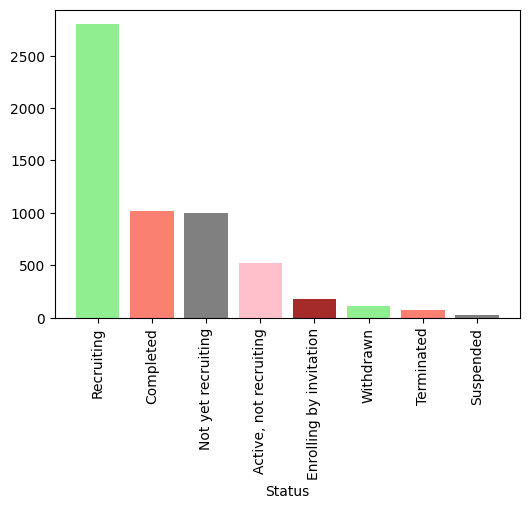

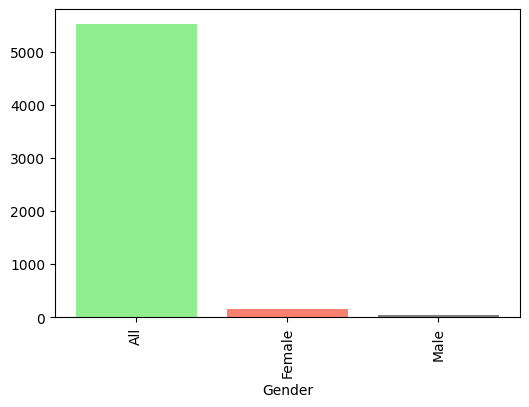

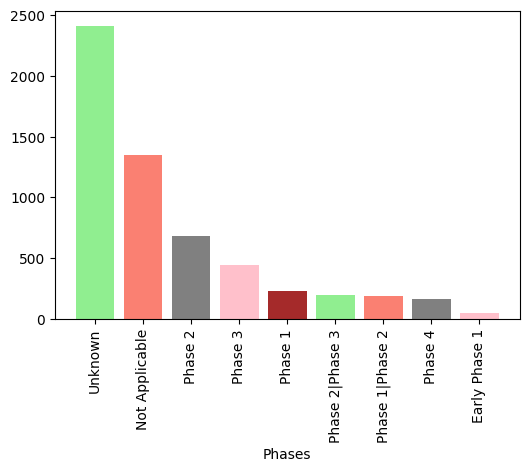

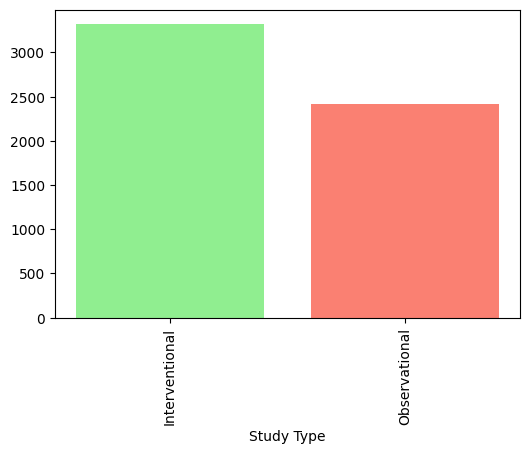

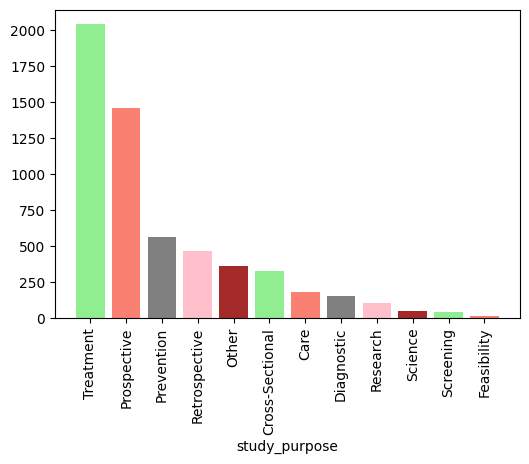

In [142]:
for col in str_cols.columns:
    value_counts = str_cols[col].value_counts()
    plt.figure(figsize=(6,4))
    plt.bar(value_counts.index.astype(str), value_counts.values, color=['lightgreen','salmon','grey','pink','brown'])
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

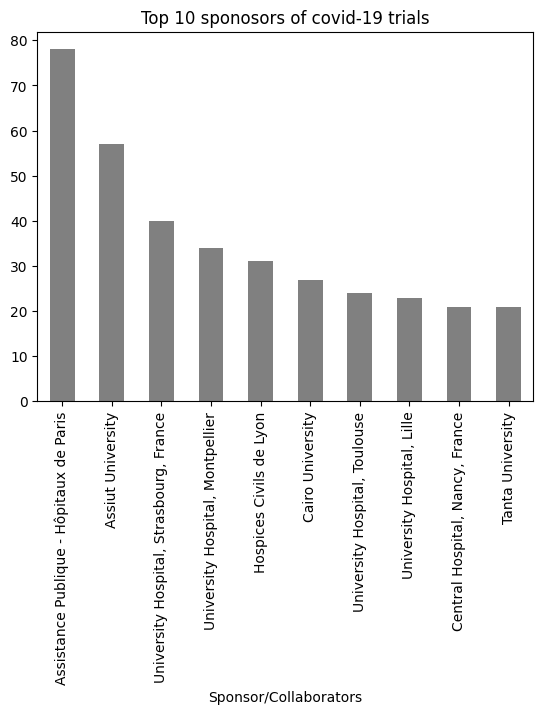

In [43]:
# Top 10 sponsors of covid-19 trials
plt.title('Top 10 sponosors of covid-19 trials')
df['Sponsor/Collaborators'].value_counts()[0:10].plot.bar(color='grey')
plt.show()

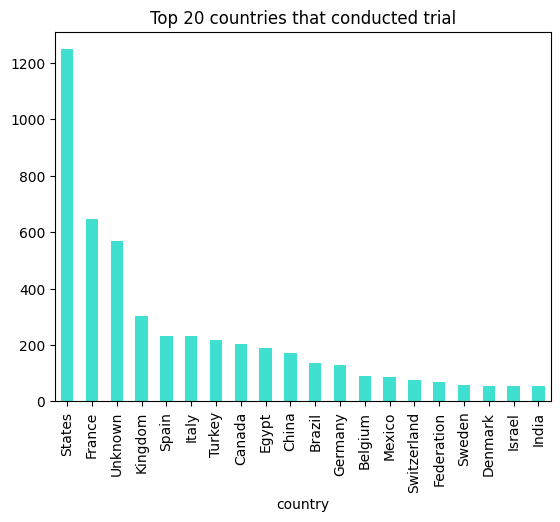

In [143]:
# Displaying the top 20 countries where the trial was conducted
df['country'].value_counts(ascending=False)[:20].plot.bar(color=['turquoise'])
plt.title('Top 20 countries that conducted trial')
plt.show()

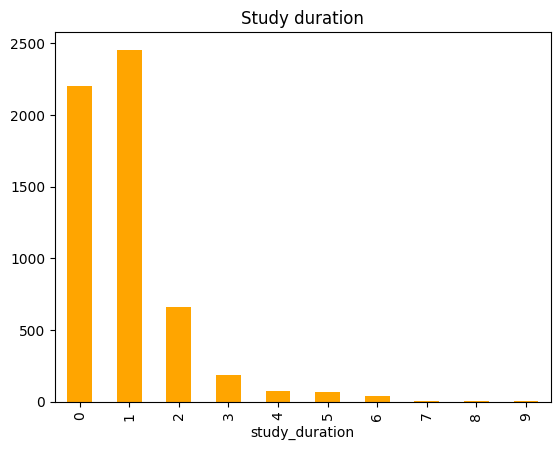

In [223]:
# Displaying the study duration
df['study_duration'].value_counts().sort_index()[:10].plot.bar(color='Orange')
plt.title('Study duration')
plt.show()

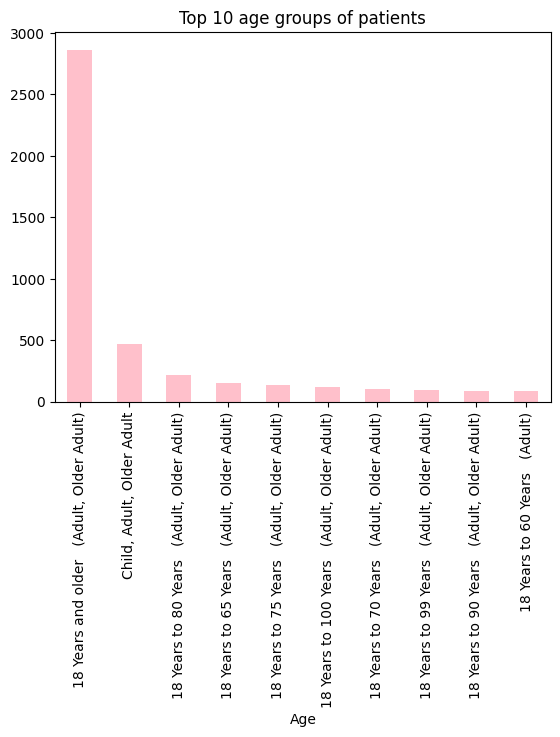

In [180]:
# Top 10 age groups of trial
plt.title('Top 10 age groups of patients')
df['Age'].value_counts()[:10].plot.bar(color='Pink')
plt.show()

<Axes: title={'center': 'Phases of trial'}, xlabel='Phases'>

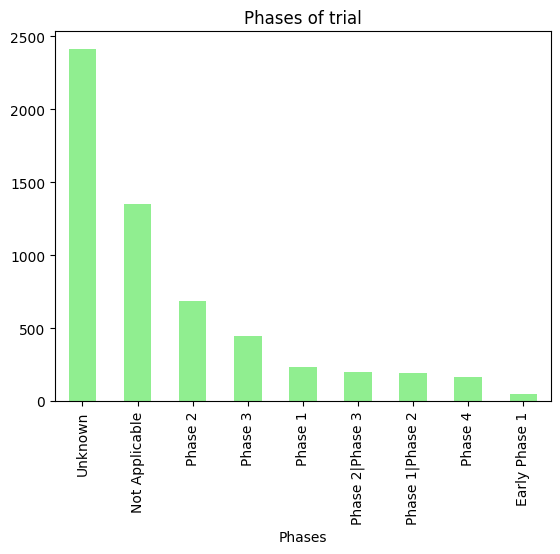

In [47]:
# Phases of covid-19 trials
plt.title('Phases of trial')
df['Phases'].value_counts()[:10].plot.bar(color='lightgreen')
plt.show()

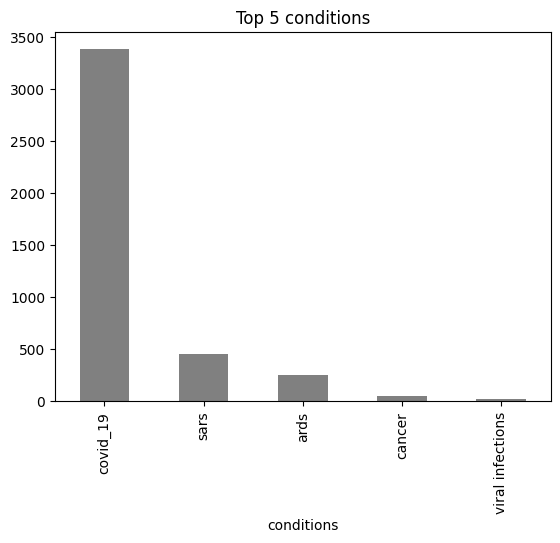

In [133]:
df['conditions'].value_counts(ascending=False)[:5].plot.bar(color='gray')
plt.title('Top 5 conditions')
plt.show()

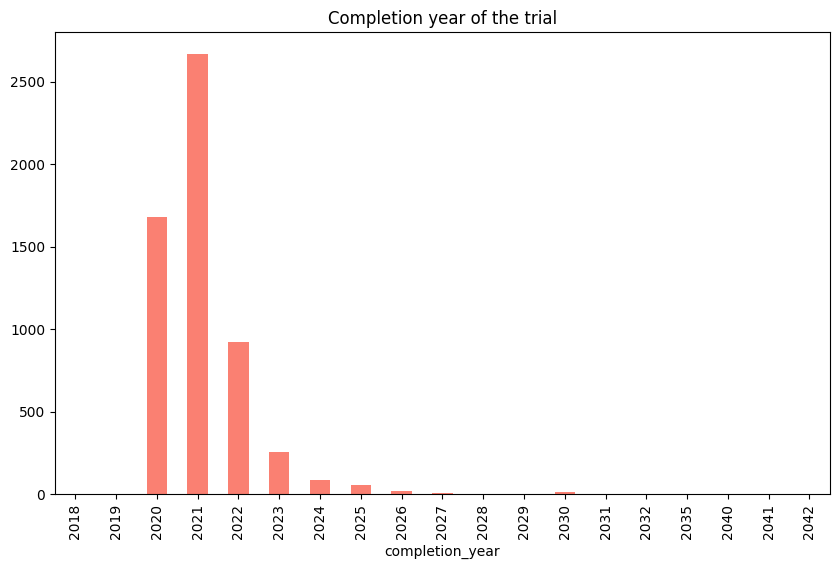

In [225]:
# Displaying the pattern of completion year
plt.figure(figsize=(10,6))
df['completion_year'].value_counts().sort_index().plot.bar(color=['Salmon'])
plt.title('Completion year of the trial')
plt.show()

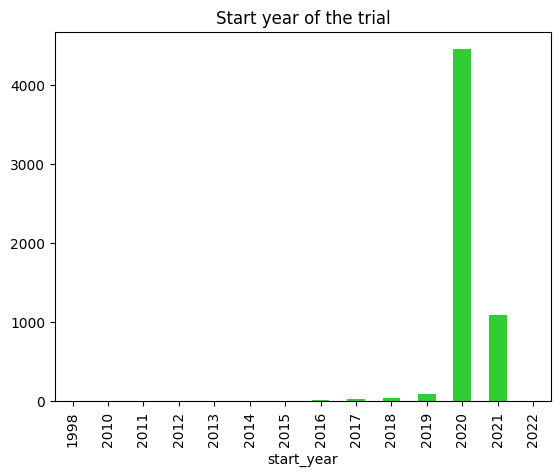

In [150]:
df['start_year'].value_counts().sort_index(). plot.bar(color=['limegreen'])
plt.title('Start year of the trial')
plt.show()

## Bivariate analysis

In [54]:
# converting the 
df['Study Type'] = df['Study Type'].apply(
    lambda x: 'Interventional' if x.startswith('I') else 
              ('Expanded access' if x.startswith('E') else 
               ('Observational' if x.startswith('O') else 'others'))
)

In [55]:
df['Study Type'].value_counts()

Study Type
Interventional    3319
Observational     2414
Name: count, dtype: int64

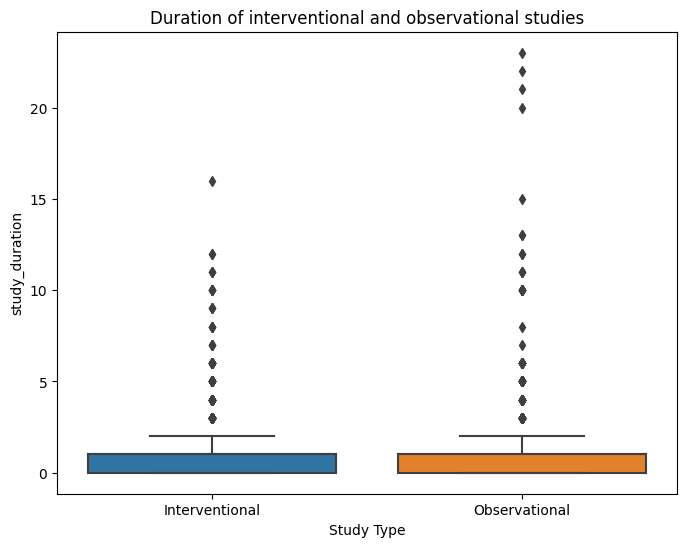

In [192]:
# Displaying the duration of study types
plt.figure(figsize=(8,6))
sns.boxplot(df, x='Study Type', y='study_duration')
plt.title('Duration of interventional and observational studies')
plt.show()

<Figure size 1000x800 with 0 Axes>

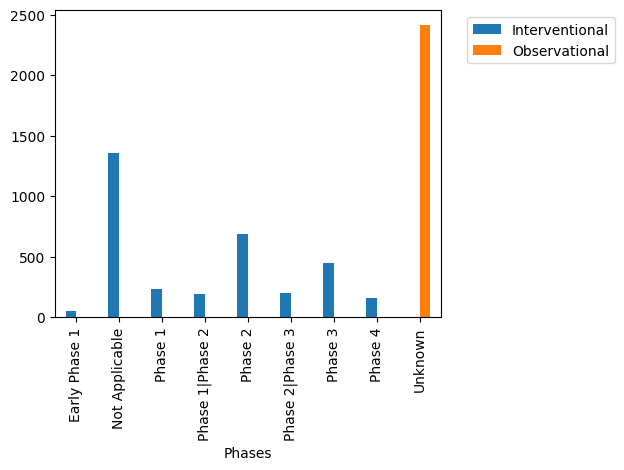

In [183]:
# Displaying the study types in different phases of covid-19 trial
plt.figure(figsize=[10,8])
pd.crosstab(df["Phases"], df["Study Type"]).plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

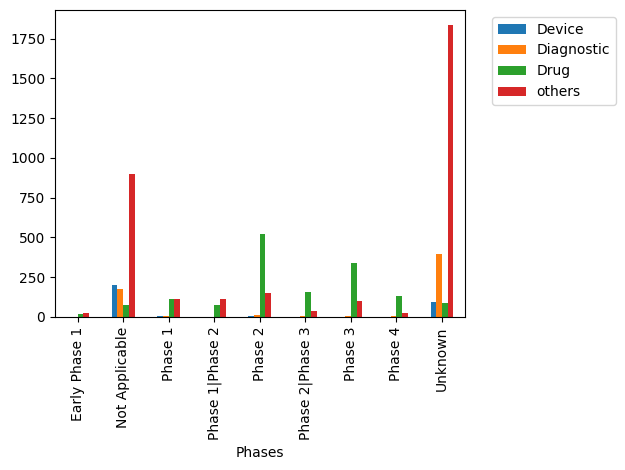

In [153]:
# Displaying the interventions in different phases of trial
plt.figure(figsize=[10,5])
pd.crosstab(df["Phases"], df["Interventions"]).plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

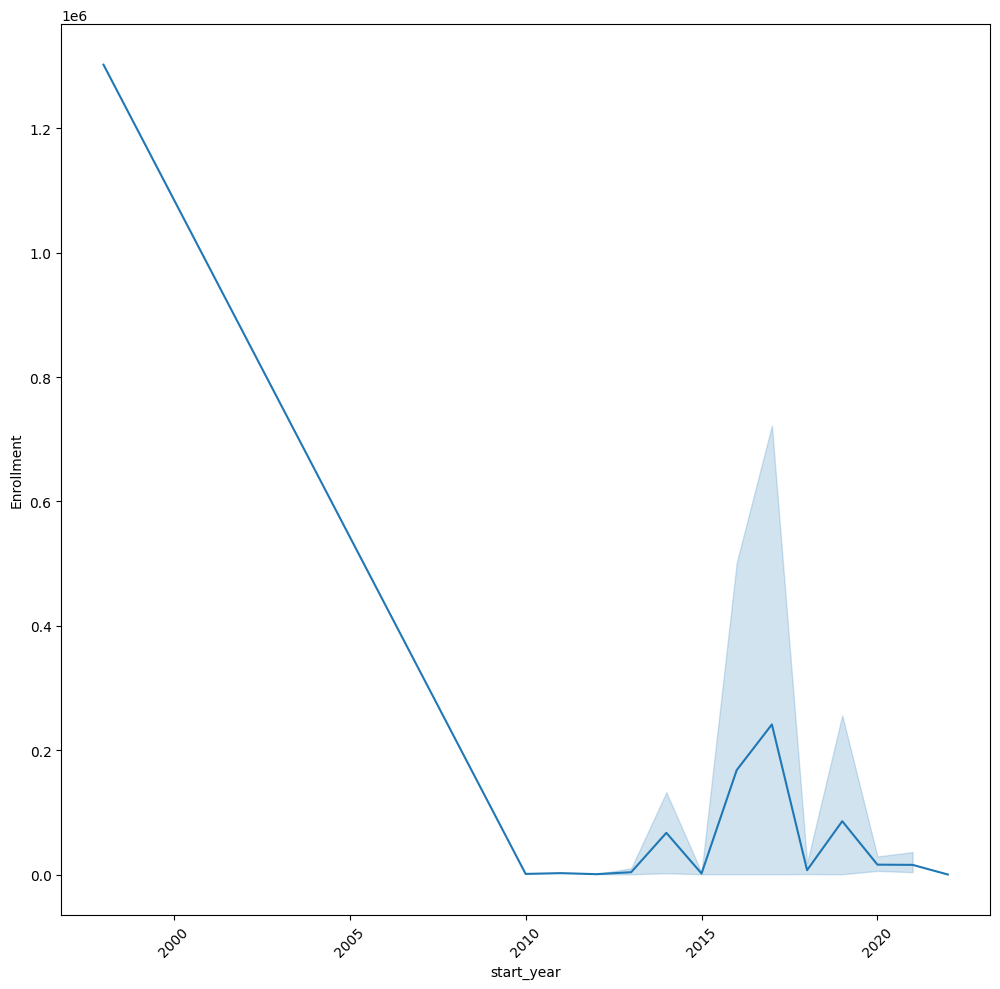

In [63]:
# Displaying the enrollment in the start years of the covid-19 trial
plt.figure(figsize=[10.10,10])
sns.lineplot(x = 'start_year', y='Enrollment', data=df)
plt.xticks(rotation=45)
plt.tight_layout()

In [202]:
df.describe()

,Enrollment,start_year,completion_year,study_duration
count,5.732000e+03,5732.000000,5732.000000,5732.000000
mean,1.835415e+04,2020.120377,2021.118981,0.998604
std,4.051408e+05,0.705308,1.297411,1.425274
min,0.000000e+00,1998.000000,2018.000000,0.000000
25%,6.000000e+01,2020.000000,2020.000000,0.000000
50%,1.700000e+02,2020.000000,2021.000000,1.000000
75%,5.527500e+02,2020.000000,2021.000000,1.000000
max,2.000000e+07,2022.000000,2042.000000,23.000000


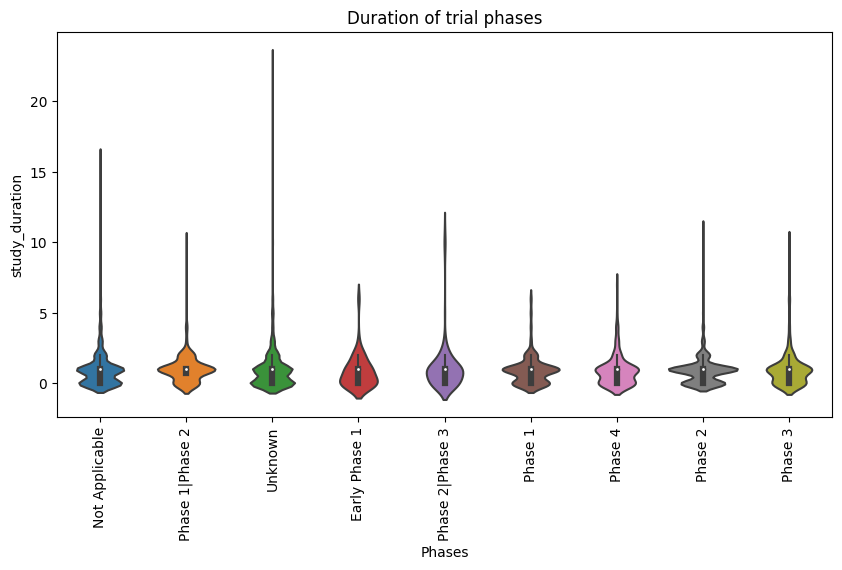

In [217]:
# Displaying the duration of trial phases
plt.figure(figsize=(10,5))
sns.violinplot(df, x='Phases', y='study_duration')
plt.title('Duration of trial phases')
plt.xticks(rotation=90)
plt.show()

# Inference

* Most of the trials are in recruiting stage
* Most trials were conducted on all genders
* The phase of the trial for most studies were not mentioned, many are not applicable. Phase 2 trial is the most common among all.
* Interventional studies are more than observational studies
* Treatment based studies were the highest, next were the prospective studies. 
* Highest number of trials were conducted in United States, next were France and United Kingdom.
* Most of the studies were conducted for less than a year and two
* Highest number of trials were conducted on adults(>=18 )
* The most common indication on which the trial was conducted was COVID-19. Next highest studies were on ARDS, SARS, cancer and viral infections
* Most of the studies completed in 2021 and started in 2020
* Observational studies take more duration than the interventional studies and their phases are not known
* Highest number of drugs were tested during Phase two trials, and phase 3 trials.The duration of these two phases are also more than the others. 
* Highest number of enrollment happened between 2015-2020
